### Initial imports

In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [42]:
# path to the first CCD image
# let's only use the images that say avg_Image_5...
path = "raw_img_data/avg_Image_5_Low_Temp_109_20250807_170213_15.fz"

In [43]:
fits.info(path)

Filename: raw_img_data/avg_Image_5_Low_Temp_109_20250807_170213_15.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   ()      
  1  CCD_A         1 CompImageHDU     11   (640, 320)   float64   
  2  CCD_B         1 CompImageHDU     11   (640, 320)   float64   
  3  CCD_D         1 CompImageHDU     11   (640, 320)   float64   
  4  CCD_C         1 CompImageHDU     11   (640, 320)   float64   


In [44]:
# peering at data
ext = 1  # CCD_A
with fits.open(path) as hdul:
    data = np.array(hdul[ext].data)
    header = hdul[ext].header

print(f"HDU name: {hdul[ext].name}")
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")

HDU name: CCD_A
Shape: (320, 640)
Data type: float64


In [45]:
data[:5]

array([[-36.22634452, -37.96014399, -33.56289462, ..., -40.06393395,
        -38.97893753, -40.32594561],
       [-37.06544212, -36.27983029, -37.5894812 , ..., -40.57618349,
        -40.36729893, -40.6499664 ],
       [-34.98005122, -39.1391331 , -40.22102751, ..., -40.69938192,
        -40.27325689, -40.37320401],
       [-33.36352954, -40.76955724, -40.25946038, ..., -39.15673378,
        -40.74821832, -37.48963228],
       [-37.45098438, -40.71905164, -40.50834326, ..., -40.56582261,
        -40.2581444 , -40.30314385]], shape=(5, 640))

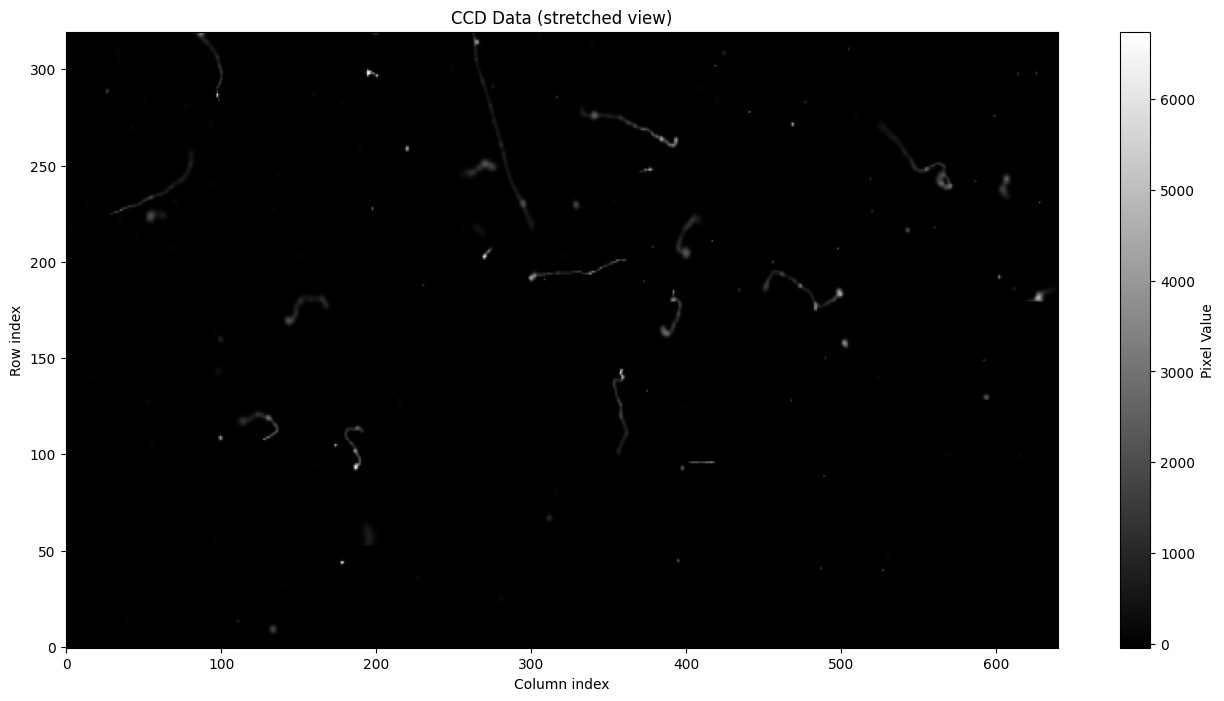

In [46]:
plt.figure(figsize=(16, 8))          # increase overall size
plt.imshow(data, cmap='gray', origin='lower', aspect='auto')  # let both axes stretch
plt.colorbar(label='Pixel Value')
plt.title("CCD Data (stretched view)")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

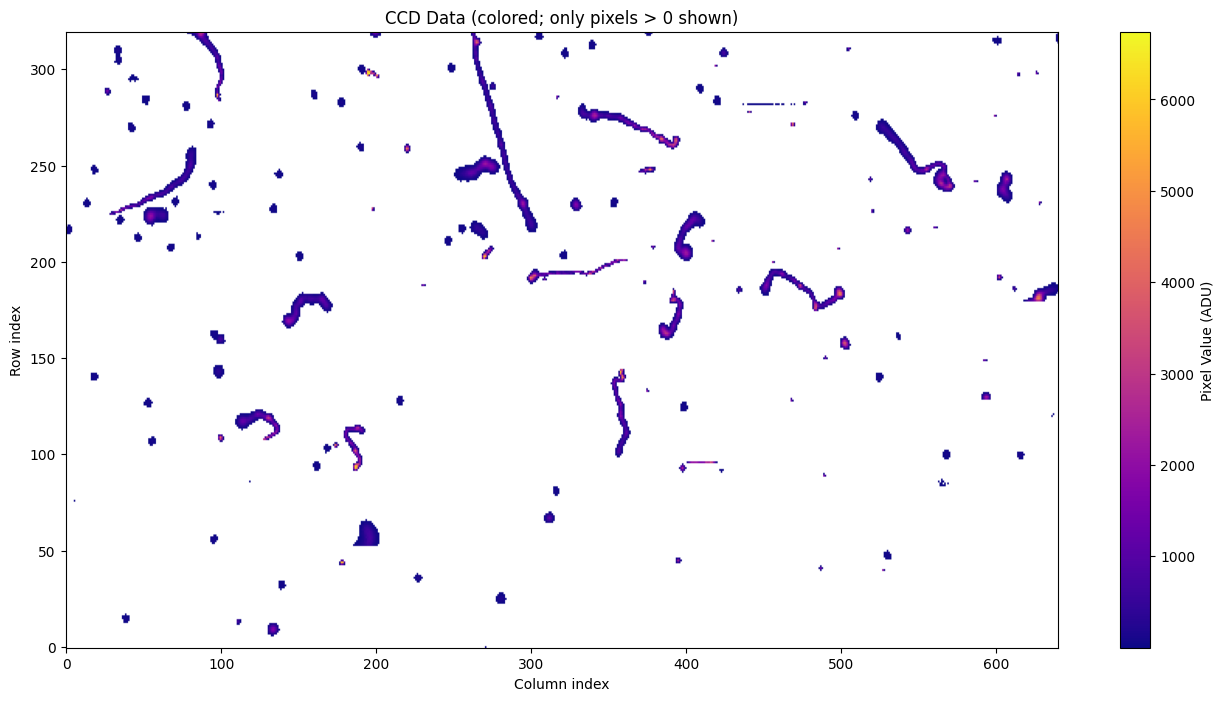

In [48]:
from matplotlib import colors

# Mask values below 2000
threshold = 0
masked_data = np.ma.masked_less(data, threshold)

# Create a colored colormap (e.g. 'plasma', 'inferno', 'viridis', etc.)
# Set masked (below-threshold) pixels to white
cmap = plt.cm.plasma.copy()
cmap.set_bad(color='white')

plt.figure(figsize=(16, 8))
plt.imshow(masked_data, cmap=cmap, origin='lower', aspect='auto')

# Add color scale and labels
plt.colorbar(label='Pixel Value (ADU)')
plt.title(f"CCD Data (colored; only pixels > {threshold} shown)")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

In [51]:
# path to image 4 which is apparently a full CCD image
path2 = "raw_img_data/avg_Image_5_Low_Temp_109_20250807_170213_15.fz"

In [52]:
fits.info(path2)

Filename: raw_img_data/avg_Image_5_Low_Temp_109_20250807_170213_15.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   ()      
  1  CCD_A         1 CompImageHDU     11   (640, 320)   float64   
  2  CCD_B         1 CompImageHDU     11   (640, 320)   float64   
  3  CCD_D         1 CompImageHDU     11   (640, 320)   float64   
  4  CCD_C         1 CompImageHDU     11   (640, 320)   float64   


In [53]:
# peering at data
ext = 1  # CCD_A
with fits.open(path2) as hdul:
    data = np.array(hdul[ext].data)
    header = hdul[ext].header

print(f"HDU name: {hdul[ext].name}")
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")

HDU name: CCD_A
Shape: (320, 640)
Data type: float64


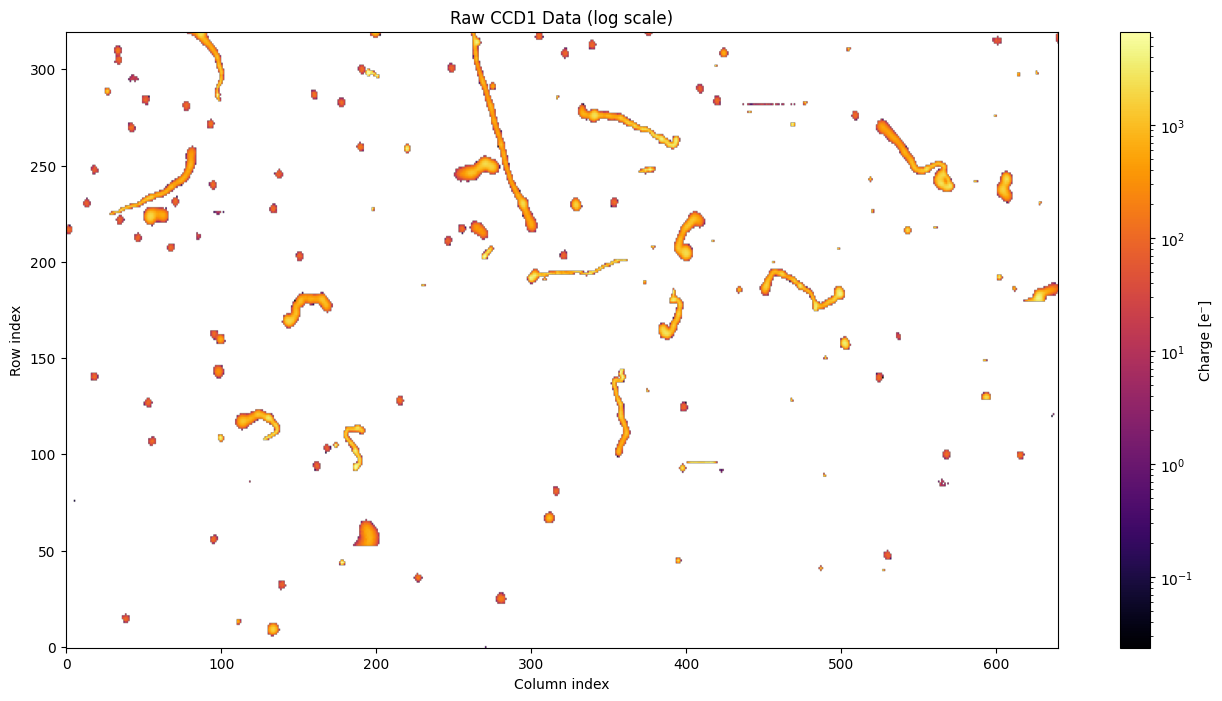

In [61]:
plt.figure(figsize=(16, 8))
plt.imshow(
    data,
    cmap='inferno',
    origin='lower',
    aspect='auto',
    norm=colors.LogNorm()  # only log scale, no other normalization tricks
)
plt.colorbar(label='Charge [e⁻]')
plt.title("Raw CCD1 Data (log scale)")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

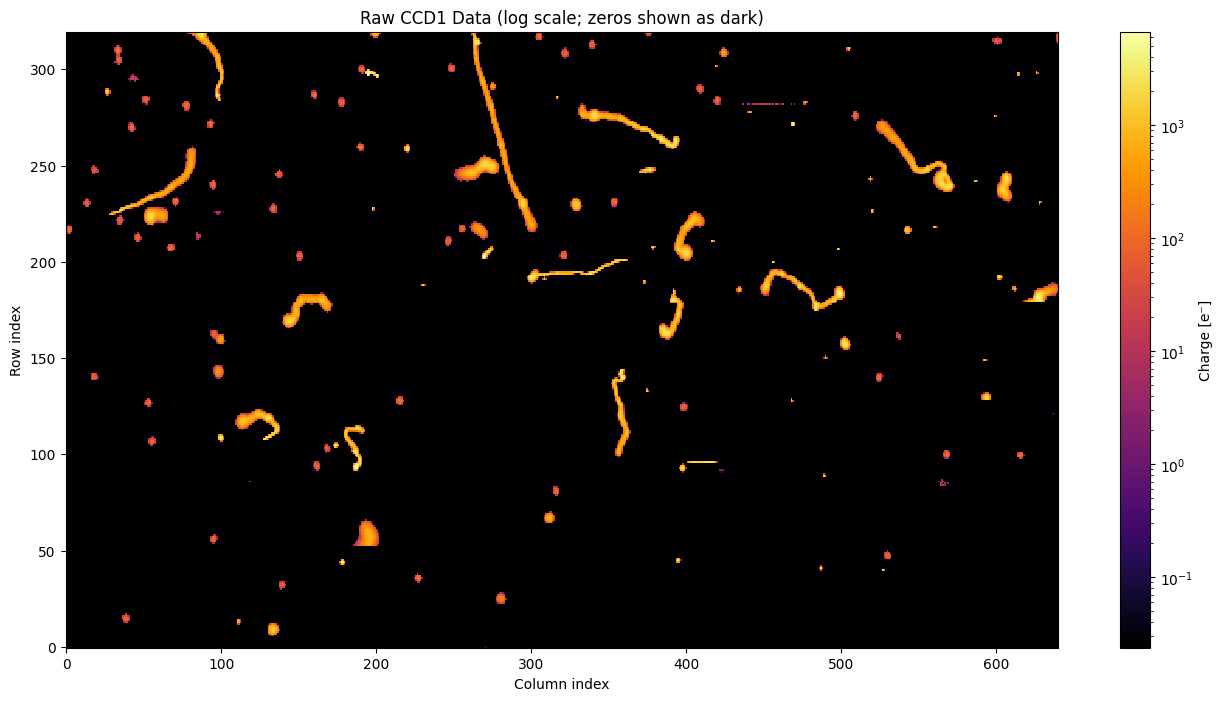

In [63]:
# data: your 2D array with zeros/positives

# mask non-positive values (LogNorm needs > 0)
arr = np.ma.masked_less_equal(data, 0)

# set "bad" (masked) color to the darkest color of inferno
cmap = plt.cm.inferno.copy()
cmap.set_bad(cmap(0))

# pick vmin as the smallest positive value in your data
min_pos = float(arr.min())   # same as np.min(data[data > 0])
vmax    = float(arr.max())
norm    = colors.LogNorm(vmin=min_pos, vmax=vmax)

plt.figure(figsize=(16, 8))
im = plt.imshow(arr, cmap=cmap, origin='lower', aspect='auto', norm=norm, interpolation='none')
plt.colorbar(im, label='Charge [e⁻]')
plt.title("Raw CCD1 Data (log scale; zeros shown as dark)")
plt.xlabel("Column index"); plt.ylabel("Row index")
plt.show()

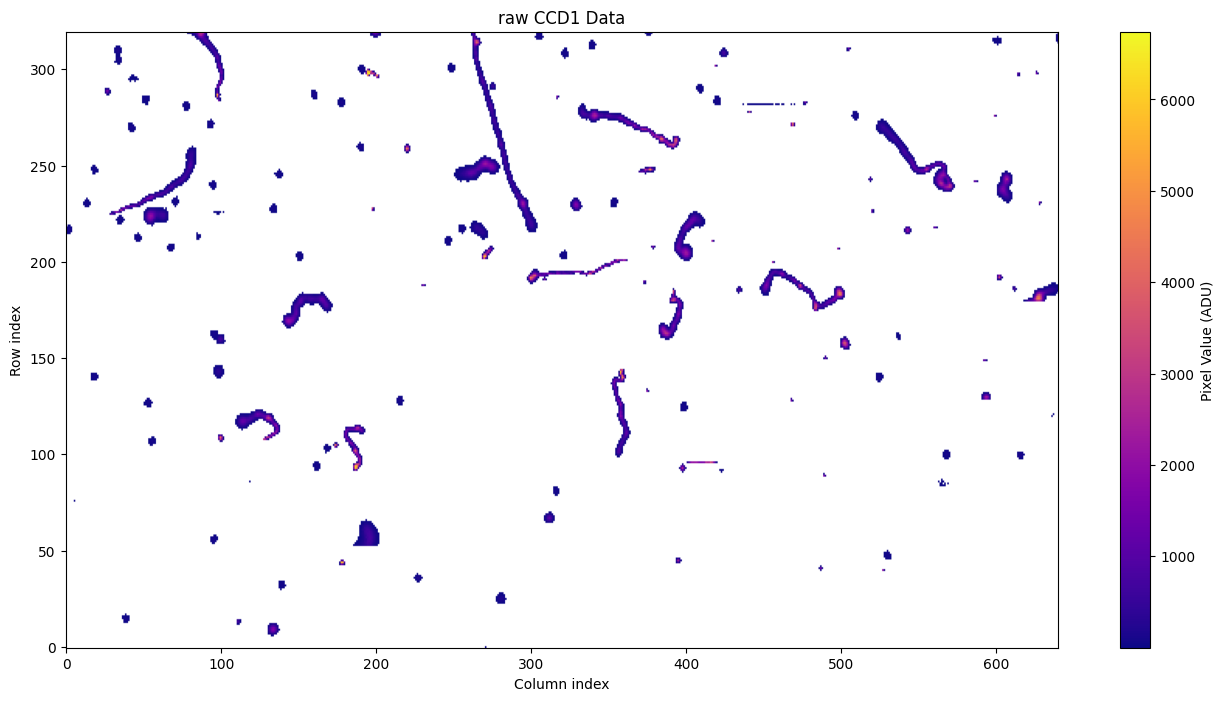

In [62]:
from matplotlib import colors

# Mask values below 2000
threshold = 0
masked_data = np.ma.masked_less(data, threshold)

# Create a colored colormap (e.g. 'plasma', 'inferno', 'viridis', etc.)
# Set masked (below-threshold) pixels to white
cmap = plt.cm.plasma.copy()
cmap.set_bad(color='white')

plt.figure(figsize=(16, 8))
plt.imshow(masked_data, cmap=cmap, origin='lower', aspect='auto')

# Add color scale and labels
plt.colorbar(label='Pixel Value (ADU)')
plt.title(f"raw CCD1 Data")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

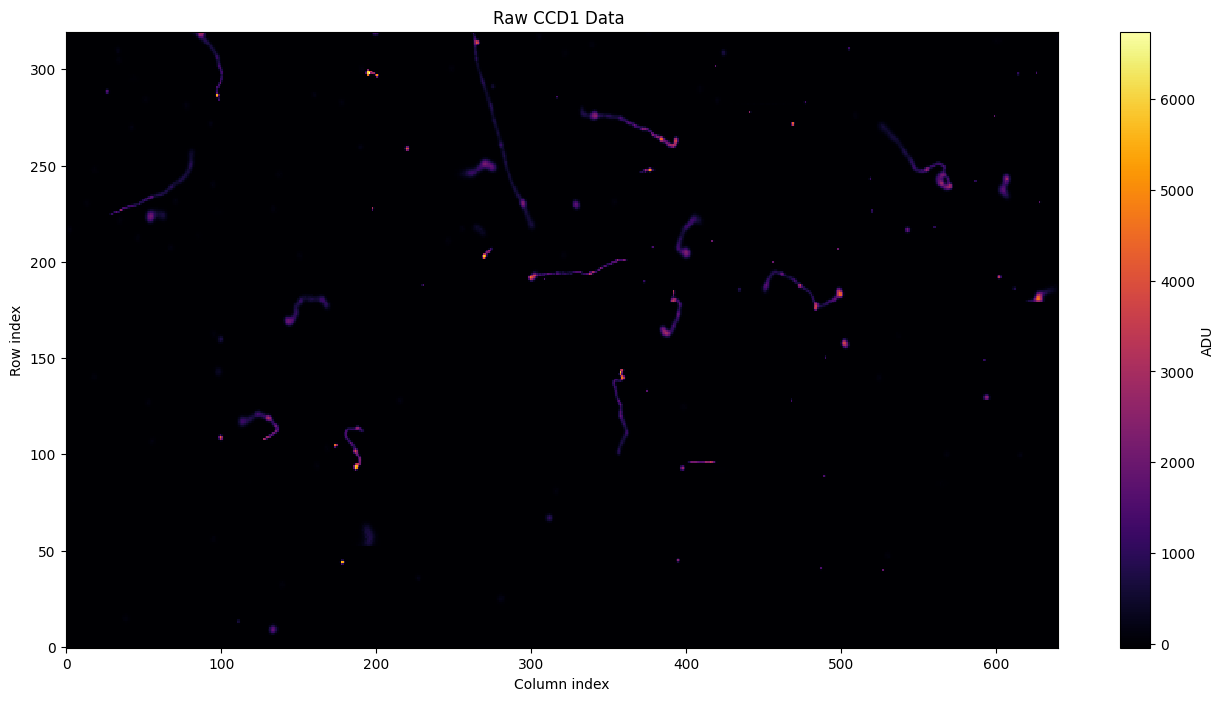

In [65]:
plt.figure(figsize=(16, 8))
plt.imshow(data, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.colorbar(label='ADU')
plt.title("Raw CCD1 Data ")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

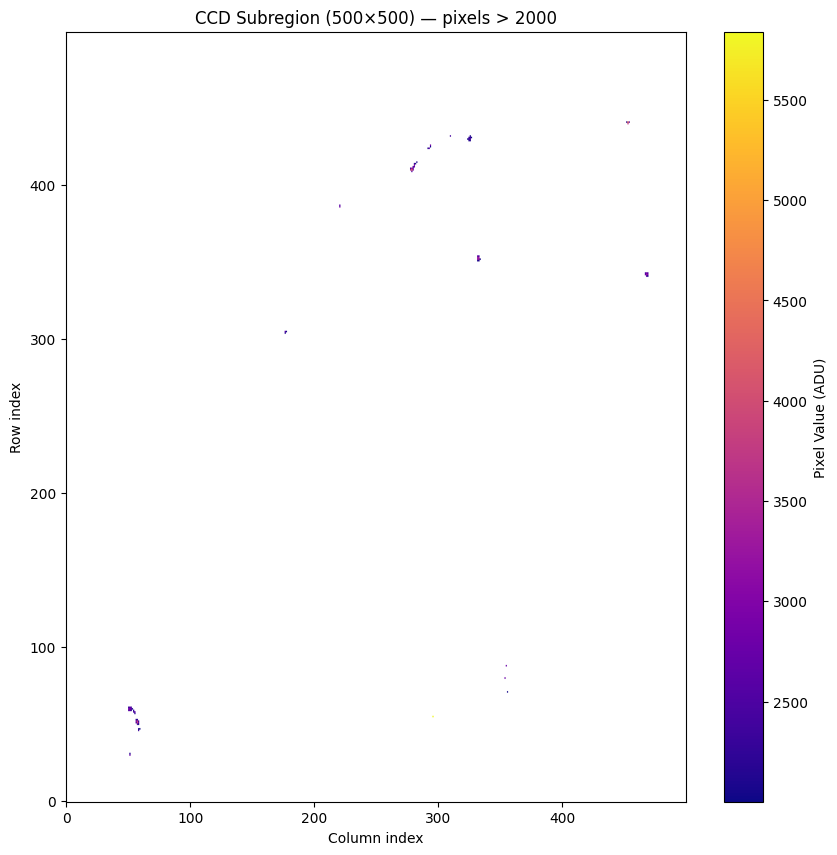

In [ ]:
# Select a 500×500 region (adjust start indices as needed)
subset = data[:500, :500]   # rows 0–499, columns 0–499

# Mask values below 2000
threshold = 2000
masked_subset = np.ma.masked_less(subset, threshold)

# Colored colormap
cmap = plt.cm.plasma.copy()
cmap.set_bad(color='white')

plt.figure(figsize=(10, 10))
plt.imshow(masked_subset, cmap=cmap, origin='lower', aspect='auto')

plt.colorbar(label='Pixel Value (ADU)')
plt.title(f"CCD Subregion (500×500) — pixels > {threshold}")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()


In [34]:
# path to the first CCD image
# let's only use the images that say avg_Image_5...
path3 = "raw_img_data/avg_Image_5_Low_Temp_109_20250807_170213_15_image_calibrated_e.fits"

In [35]:
# --- Open and inspect ---
with fits.open(path3) as hdul:
    # Print info about all HDUs
    hdul.info()

    # Access the main image (first extension)
    data = hdul[0].data
    header = hdul[0].header

Filename: raw_img_data/avg_Image_5_Low_Temp_109_20250807_170213_15_image_calibrated_e.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  CAL_E         1 PrimaryHDU     190   (640, 1280)   float64   


In [36]:
type(data)

numpy.ndarray

In [37]:
data.shape

(1280, 640)

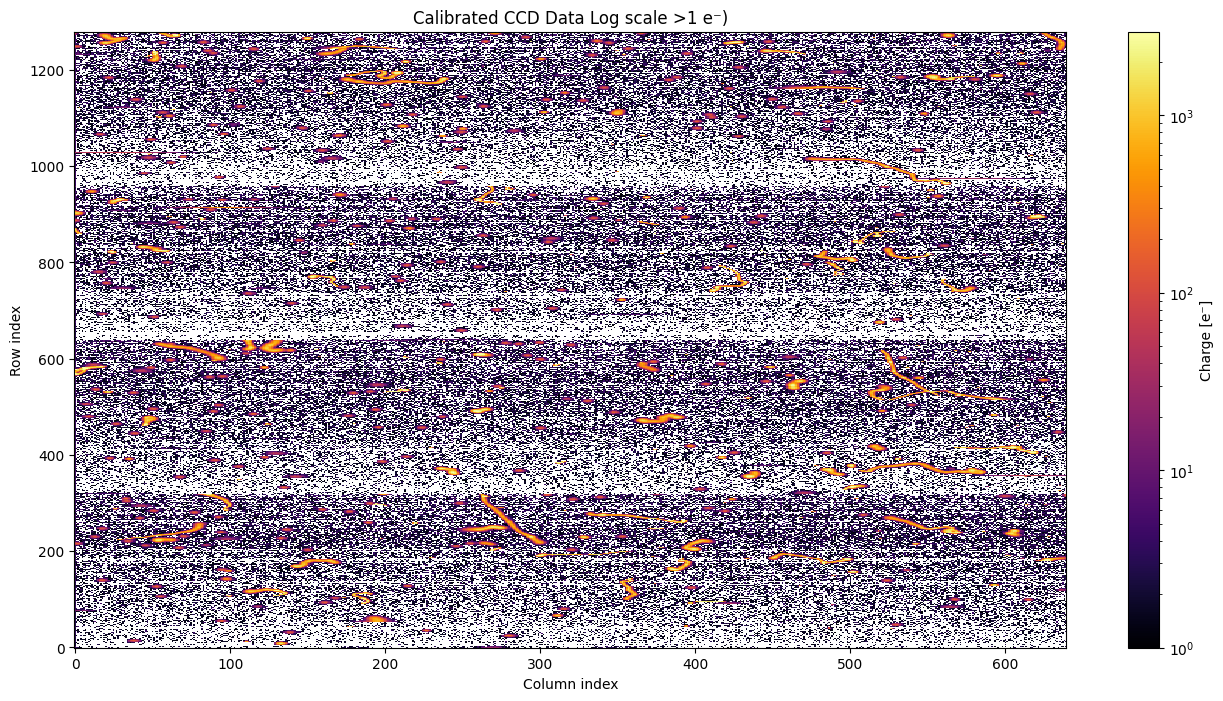

In [25]:
from matplotlib import colors

threshold = 1
masked = np.ma.masked_less(data, threshold)

vmin = threshold
vmax = max(5, np.percentile(masked.compressed(), 99.9))  # pick a sensible top
norm = colors.LogNorm(vmin=vmin, vmax=vmax)

plt.figure(figsize=(16,8))
plt.imshow(masked, cmap='inferno', origin='lower', aspect='auto',
           norm=norm, interpolation='none')
plt.colorbar(label='Charge [e⁻]')
plt.title(f"Calibrated CCD Data Log scale >{threshold} e⁻)")
plt.xlabel("Column index"); plt.ylabel("Row index")
plt.show()


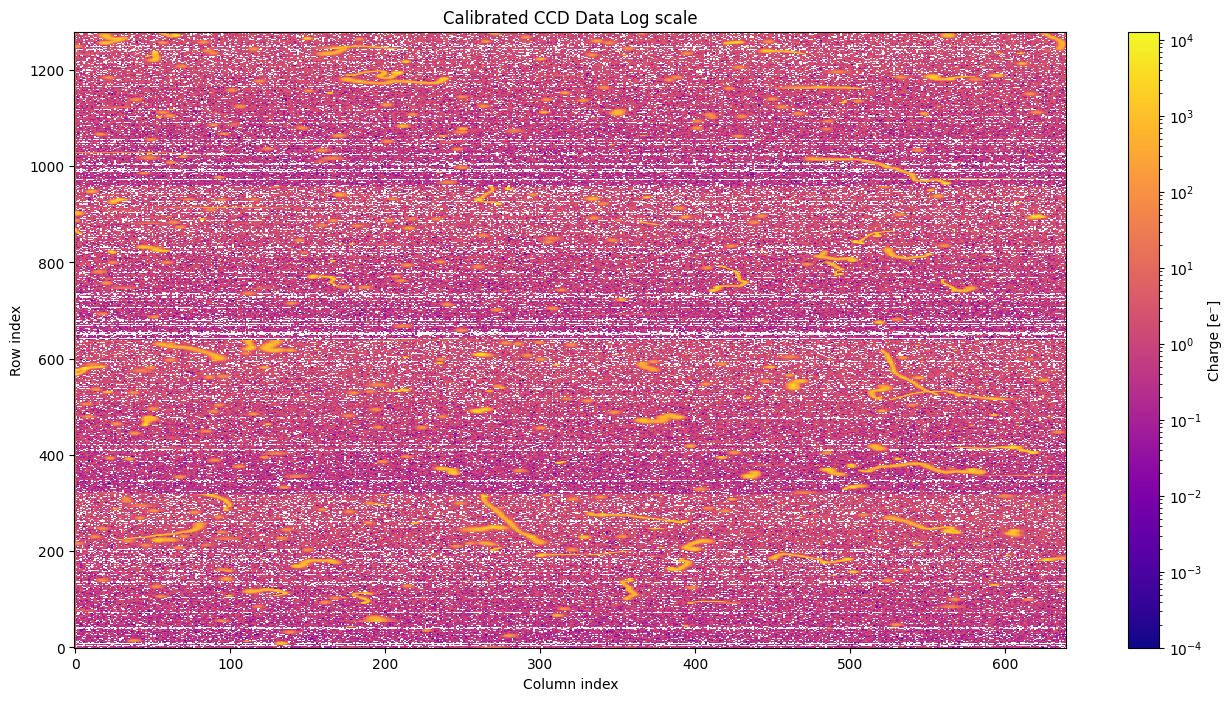

In [32]:
plt.figure(figsize=(16,8))

# choose a new colormap (try 'plasma', 'cividis', or 'turbo')
cmap = plt.cm.plasma

# optional: reset normalization if you want the colorbar to adapt dynamically
norm = colors.LogNorm(vmin=max(data.min(), 1e-4), vmax=data.max())

img = plt.imshow(
    data,
    cmap=cmap,
    origin='lower',
    aspect='auto',
    norm=norm,
    interpolation='none'
)

plt.colorbar(img, label='Charge [e⁻]')
plt.title("Calibrated CCD Data Log scale")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

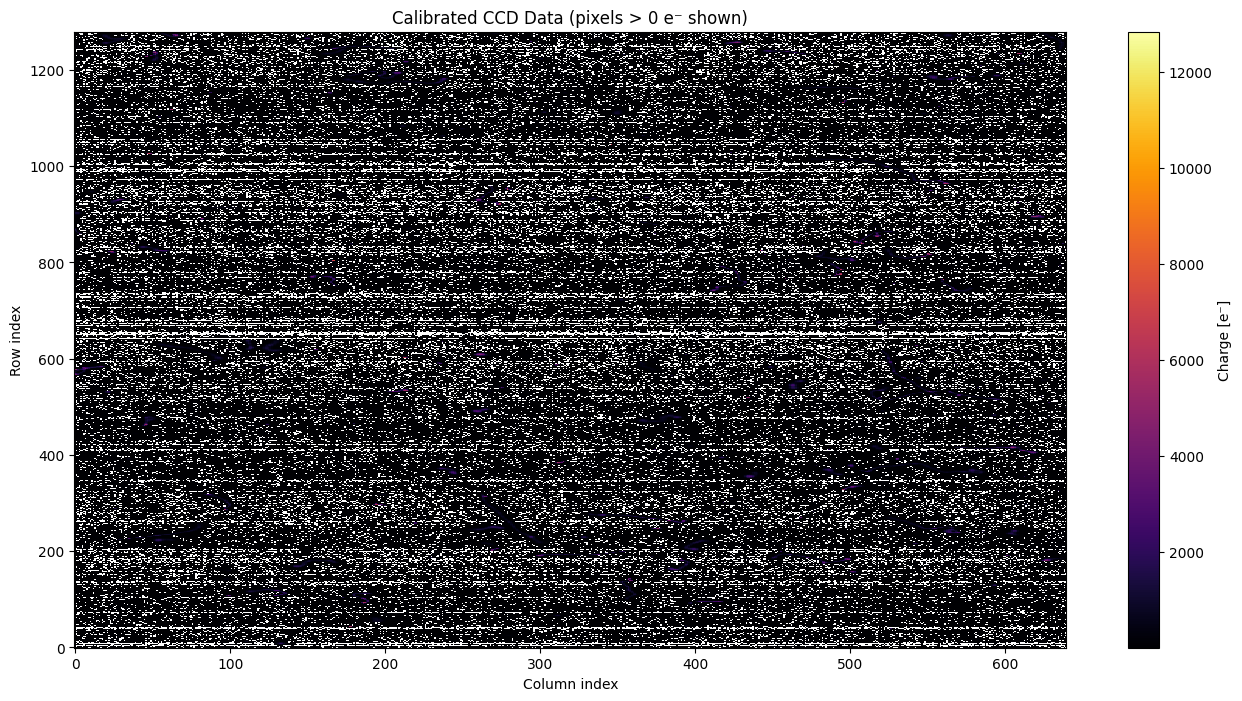

In [17]:
# 'data' should be your calibrated CCD image (e.g. from the FITS you just loaded)
# if you haven't loaded it yet:
# from astropy.io import fits
# with fits.open(f"{rdata.output}image_calibrated_e.fits") as hdul:
#     data = hdul[0].data

# --- Threshold for display (hide low-signal pixels) ---
threshold = 0   
masked_data = np.ma.masked_less(data, threshold)

# --- Colormap setup ---
cmap = plt.cm.inferno.copy()     # or 'plasma', 'viridis', etc.
cmap.set_bad(color='white')      # masked pixels appear white

# --- Plot ---
plt.figure(figsize=(16, 8))
plt.imshow(masked_data,
           cmap=cmap,
           origin='lower',
           aspect='auto',
           interpolation='none')

plt.colorbar(label='Charge [e⁻]')
plt.title(f"Calibrated CCD Data (pixels > {threshold} e⁻ shown)")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()


### Model 1: BDT on clustered data

Train a BDT (AdaBoost) on clustered data so see if it can reproduce cuts such as front or back events. We currently identify front vs back events based on the $\sigma_{XY}$ value, with $\sigma_{XY}$ > 1 corresponding to back events (under the assumption that there will be more spread due to having to travel through the depth of the CCD). It will be interesting to see if the BDT is able to identify other features that distinguish front from back events.


In [ ]:
file_path = "/content/drive/My Drive/Clustering project/2025-08-07-DM01_DM02_DM03_Low_Temp/Analysis/Image_5/DM04/panaSKImg_clustersRec_avg_Image_5_Low_Temp_109_20250807_192535_17_ext3.root"

with uproot.open(file_path) as f:
    print(f.keys())

['clustersRec;1', 'info;1', 'process_config;1']


In [ ]:
import awkward as ak

In [ ]:
pip install awkward-pandas

#### You can skip these now!!

In [ ]:
# Root folder (Colab Drive path)
path = "/content/drive/My Drive/Clustering project/2025-08-07-DM01_DM02_DM03_Low_Temp/Analysis/Image_5"

In [ ]:
# Recursively gather .root files (sorted → stable file_index)
root_files = []
for root, _, files in os.walk(path):
    for f in files:
        if f.endswith(".root"):
            root_files.append(os.path.join(root, f))
root_files.sort()

print(f"Found {len(root_files)} ROOT files.")

Found 44 ROOT files.


In [ ]:
root_files[0]

'/content/drive/My Drive/Clustering project/2025-08-07-DM01_DM02_DM03_Low_Temp/Analysis/Image_5/DM04/panaSKImg_clustersRec_avg_Image_5_Low_Temp_109_20250807_192535_17_ext3.root'

In [ ]:
# load example file
file1 = uproot.open(root_files[0])

In [ ]:
clustersRec_tree = file1["clustersRec"]

In [ ]:
df = clustersRec_tree.arrays(library="pd")

In [ ]:
df.head()

,RUNID,Nclusters,DX,DY,Energy,Energy_AVG,Energy_PS,Npix,PosX,PosY,...,readout_end,readout_start,seed_nsig_delta,seed_nsig_max,seed_nsig_min,seed_nsig_pixels,sigma_seed_eV,wSTD_X,wSTD_XY,wSTD_Y
0,0,5295,[24.0 1.0 8.0 ... 1.0 1.0 1.0],[320.0 1.0 6.0 ... 1.0 1.0 1.0],[9.776504516601562 0.003962206654250622 30.286...,[-17983.6640625 -35.98348617553711 9761.120117...,[3476.67138671875 1.409019947052002 10770.2509...,[574 1 27 ... 1 1 1],[3.7876498699188232 57.0 67.27091217041016 ......,[217.65089416503906 1.0 1.4600633382797241 ......,...,[1754624256.0 1754624256.0 1754624256.0 ... 17...,[1754619904.0 1754619904.0 1754619904.0 ... 17...,[5472.1611328125 0.0 98589.109375 ... 0.0 0.0 ...,[5487.18798828125 57.104339599609375 98604.742...,[15.027036666870117 57.104339599609375 15.6316...,"[list([143.92462158203125, 148.60308837890625,...",[0.06938538700342178 0.06938538700342178 0.069...,[2.9013049602508545 0.0 0.9637080430984497 ......,[48.62907028198242 0.0 0.7981138229370117 ... ...,[68.71066284179688 0.0 0.5875697135925293 ... ...


In [ ]:
def to_list_maybe(x):
    # Handle common array-likes
    if isinstance(x, (list, tuple, np.ndarray, pd.Series)):
        return list(x)
    # Awkward arrays
    if ak is not None:
        try:
            return ak.to_list(x)
        except Exception:
            pass
    # Some awkward objects have .to_list()
    if hasattr(x, "to_list"):
        try:
            return x.to_list()
        except Exception:
            pass
    # Not an array -> return None so we can repeat later
    return None

In [ ]:
dfs = []

for file_index, file in enumerate(root_files):
    with uproot.open(file) as f:
        tree = f["clustersRec"]
        df = tree.arrays(library="pd")  # your original single-tree expansion works, so keep this

        # Drop blocker columns if present
        cols = [c for c in df.columns if c not in ["RUNID", "Nclusters"]]

        # Use the first (and only) row
        row = df.iloc[0]

        # --- Expand arrays into flat dataframe ---
        # Find target length from first array-like column
        N = None
        for c in cols:
            seq = to_list_maybe(row[c])
            if seq is not None:
                N = len(seq)
                break
        if N is None:
            raise ValueError("Couldn't find any array-like columns to expand.")

        # Build dict of columns → flattened sequences (repeat scalars)
        data = {}
        for c in cols:
            seq = to_list_maybe(row[c])
            if seq is None:
                data[c] = [row[c]] * N
            else:
                data[c] = seq

        # Add file tracking info
        data["source_file"] = [os.path.basename(file)] * N
        data["file_index"] = [file_index] * N

        df_expanded = pd.DataFrame(data).reset_index(drop=True)
        dfs.append(df_expanded)

# Combine all files
df_all = pd.concat(dfs, ignore_index=True)

print("Combined DataFrame shape:", df_all.shape)
df_all.head()


Combined DataFrame shape: (108053, 59)


,DX,DY,Energy,Energy_AVG,Energy_PS,Npix,PosX,PosY,Qmax,QmaxX,...,seed_nsig_delta,seed_nsig_max,seed_nsig_min,seed_nsig_pixels,sigma_seed_eV,wSTD_X,wSTD_XY,wSTD_Y,source_file,file_index
0,24.0,320.0,9.776505,-17983.664062,3476.671387,574,3.787650,217.650894,0.380731,4.0,...,5472.161133,5487.187988,15.027037,"[143.92462158203125, 148.60308837890625, 129.6...",0.069385,2.901305,48.629070,68.710663,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
1,1.0,1.0,0.003962,-35.983486,1.409020,1,57.000000,1.000000,0.003962,57.0,...,0.000000,57.104340,57.104340,[57.104339599609375],0.069385,0.000000,0.000000,0.000000,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
2,8.0,6.0,30.286270,9761.120117,10770.250977,27,67.270912,1.460063,6.841728,67.0,...,98589.109375,98604.742188,15.631653,"[181.9546661376953, 6714.45361328125, 49764.17...",0.069385,0.963708,0.798114,0.587570,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
3,2.0,2.0,0.006992,-72.271851,2.486508,2,76.514618,1.485385,0.003598,77.0,...,2.945519,51.858986,48.913467,"[51.858985900878906, 48.91346740722656]",0.069385,0.499786,0.499786,0.499786,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
4,2.0,2.0,0.005041,-72.965790,1.792568,2,79.218979,1.781019,0.003937,79.0,...,40.831360,56.740005,15.908648,"[15.908648490905762, 56.74000549316406]",0.069385,0.413555,0.413555,0.413555,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0


In [ ]:
# saving final df for easy loading as that lowkey took a minute to run!
# Choose where to save it
save_path = "/content/drive/My Drive/Clustering project/combined_clusters.csv"

# Save to CSV
df_all.to_csv(save_path, index=False)

NameError: name 'df_all' is not defined

#### Load in data

In [ ]:
csv_path = "/content/drive/My Drive/Clustering project/combined_clusters.csv"
df = pd.read_csv(csv_path)

In [ ]:
print(df.dtypes)
df.head()

DX                    float64
DY                    float64
Energy                float64
Energy_AVG            float64
Energy_PS             float64
Npix                    int64
PosX                  float64
PosY                  float64
Qmax                  float64
QmaxX                 float64
QmaxY                 float64
RMSX                  float64
RMSY                  float64
STD_X                 float64
STD_XY                float64
STD_Y                 float64
ccd                     int64
closest_cls_dist      float64
closest_cls_dist_X    float64
closest_cls_dist_Y    float64
closest_cls_id        float64
cluster_id              int64
dwSTD_X               float64
dwSTD_Y               float64
fPosX                 float64
fPosY                 float64
fSTD_X                float64
fSTD_Y                float64
has_seed                int64
maxX                  float64
maxY                  float64
meanX                 float64
meanY                 float64
minX      

,DX,DY,Energy,Energy_AVG,Energy_PS,Npix,PosX,PosY,Qmax,QmaxX,...,seed_nsig_delta,seed_nsig_max,seed_nsig_min,seed_nsig_pixels,sigma_seed_eV,wSTD_X,wSTD_XY,wSTD_Y,source_file,file_index
0,24.0,320.0,9.776505,-17983.664062,3476.671387,574,3.787650,217.650894,0.380731,4.0,...,5472.161133,5487.187988,15.027037,"[143.92462158203125, 148.60308837890625, 129.6...",0.069385,2.901305,48.629070,68.710663,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
1,1.0,1.0,0.003962,-35.983486,1.409020,1,57.000000,1.000000,0.003962,57.0,...,0.000000,57.104340,57.104340,[57.104339599609375],0.069385,0.000000,0.000000,0.000000,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
2,8.0,6.0,30.286270,9761.120117,10770.250977,27,67.270912,1.460063,6.841728,67.0,...,98589.109375,98604.742188,15.631653,"[181.9546661376953, 6714.45361328125, 49764.17...",0.069385,0.963708,0.798114,0.587570,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
3,2.0,2.0,0.006992,-72.271851,2.486508,2,76.514618,1.485385,0.003598,77.0,...,2.945519,51.858986,48.913467,"[51.858985900878906, 48.91346740722656]",0.069385,0.499786,0.499786,0.499786,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0
4,2.0,2.0,0.005041,-72.965790,1.792568,2,79.218979,1.781019,0.003937,79.0,...,40.831360,56.740005,15.908648,"[15.908648490905762, 56.74000549316406]",0.069385,0.413555,0.413555,0.413555,panaSKImg_clustersRec_avg_Image_5_Low_Temp_109...,0


In [ ]:
# Drop pixel specific cols
cols_to_drop = [
    "pixels_E", "pixels_E_AVG", "pixels_E_PS",
    "pixels_x", "pixels_y", "pixels_z",
    "projectionX", "projectionX_cols",
    "projectionY", "projectionY_rows"
]

df = df.drop(columns=cols_to_drop, errors="ignore")

print("New shape:", df.shape)

New shape: (108053, 49)


In [ ]:
# label events as front or back depending on whether they are greater than or smaller than 1.
# Creates new col "is_front" that contains a true/false bool, with true meaning STD_XY < 1, and a front event.
df["is_front"] = df["STD_XY"] < 1

# Quick check
print(df[["STD_XY", "is_front"]].head())

      STD_XY  is_front
0  94.376244     False
1   0.000000      True
2   2.527761     False
3   0.707107      True
4   0.707107      True


In [ ]:
df.columns.to_list()

['DX',
 'DY',
 'Energy',
 'Energy_AVG',
 'Energy_PS',
 'Npix',
 'PosX',
 'PosY',
 'Qmax',
 'QmaxX',
 'QmaxY',
 'RMSX',
 'RMSY',
 'STD_X',
 'STD_XY',
 'STD_Y',
 'ccd',
 'closest_cls_dist',
 'closest_cls_dist_X',
 'closest_cls_dist_Y',
 'closest_cls_id',
 'cluster_id',
 'dwSTD_X',
 'dwSTD_Y',
 'fPosX',
 'fPosY',
 'fSTD_X',
 'fSTD_Y',
 'has_seed',
 'maxX',
 'maxY',
 'meanX',
 'meanY',
 'minX',
 'minY',
 'nfile',
 'qmin_cluster_seed',
 'readout_end',
 'readout_start',
 'seed_nsig_delta',
 'seed_nsig_max',
 'seed_nsig_min',
 'seed_nsig_pixels',
 'sigma_seed_eV',
 'wSTD_X',
 'wSTD_XY',
 'wSTD_Y',
 'source_file',
 'file_index',
 'is_front']

In [ ]:
# dropping more cols
cols_to_drop = [
    "ccd",
    "closest_cls_dist",
    "closest_cls_dist_X",
    "closest_cls_dist_Y",
    "closest_cls_id",
    "cluster_id",
    "nfile"
]

df = df.drop(columns=cols_to_drop, errors="ignore")

print("New shape:", df.shape)

New shape: (108053, 43)


In [ ]:
df = df.drop(columns='seed_nsig_pixels', errors="ignore")

In [ ]:
# Now we can see that everything is some numerical data type.
print(df.dtypes)

DX                   float64
DY                   float64
Energy               float64
Energy_AVG           float64
Energy_PS            float64
Npix                   int64
PosX                 float64
PosY                 float64
Qmax                 float64
QmaxX                float64
QmaxY                float64
RMSX                 float64
RMSY                 float64
STD_X                float64
STD_XY               float64
STD_Y                float64
dwSTD_X              float64
dwSTD_Y              float64
fPosX                float64
fPosY                float64
fSTD_X               float64
fSTD_Y               float64
has_seed               int64
maxX                 float64
maxY                 float64
meanX                float64
meanY                float64
minX                 float64
minY                 float64
qmin_cluster_seed    float64
readout_end          float64
readout_start        float64
seed_nsig_delta      float64
seed_nsig_max        float64
seed_nsig_min 

In [ ]:
# checking for class imbalance
df["is_front"].value_counts(normalize=True)

,proportion
is_front,
True,0.521901
False,0.478099


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [ ]:
# target
y = df["is_front"].astype(bool)
# features (note: also drop STD_XY as the model will use this column to get a trivial result)
X = df.drop(columns=["is_front", "STD_XY", "file_index", "source_file"], errors="ignore")
# train test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# AdaBoost with decision stumps
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=100, random_state=42)

In [ ]:
proba_test = []
proba_test = ada.predict_proba(X_test)[:, 1]  # get “how confident” for each sample
y_pred = (proba_test >= 0.5)                  # turn that confidence into yes/no labels

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9897274536115866


Model does excellently, with a 99% accuracy predict front vs back events. I suspect this is due to other features such as STD_Y or STD_X being highly correlated with the predictor.

In [ ]:
# get feature importances as sort in descending oder
importances = pd.Series(ada.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances.head(20))

wSTD_XY       0.311363
STD_X         0.198451
Npix          0.175232
STD_Y         0.150365
DY            0.087103
DX            0.077486
Energy_PS     0.000000
Energy_AVG    0.000000
Energy        0.000000
Qmax          0.000000
QmaxX         0.000000
QmaxY         0.000000
RMSX          0.000000
PosX          0.000000
RMSY          0.000000
dwSTD_X       0.000000
dwSTD_Y       0.000000
fPosX         0.000000
fPosY         0.000000
fSTD_X        0.000000
dtype: float64


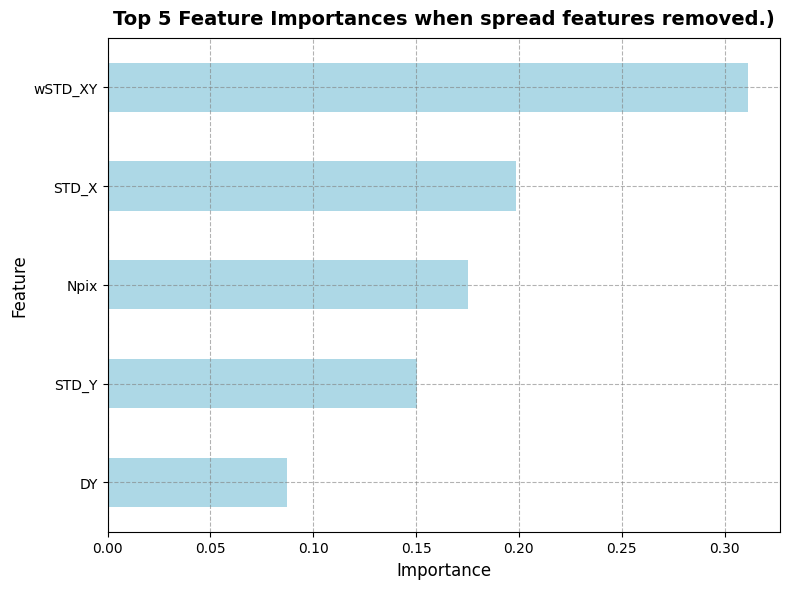

In [ ]:
plt.figure(figsize=(8,6))
importances.head(5).plot(
    kind="barh",
    color="#ADD8E6",     # light blue
    edgecolor="none"
)
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.6, color="gray")  # subtle background grid
plt.title("Top 5 Feature Importances when spread features removed.)", fontsize=14, weight="bold", pad=10)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

As expected, the most important features continued to be related to the spreads of the pixels. Energu related information is almost completely useless in predicting. Let's verify this by removing all spread related features and predicting again to see if other predictors become more meaningfull/ how badly accuracy falls off.

In [ ]:
# new train test split
spread_cols = ["STD_XY", "wSTD_XY", "STD_X", "STD_Y", "Npix", "DX", "DY", "wSTD_Y", "fSTD_Y", "wSTD_X", "fSTD_X", "dwSTD_Y", "dwSTD_X"]
y = df["is_front"].astype(bool)
X2 = df.drop(columns=["is_front", "file_index", "source_file"] + spread_cols, errors="ignore")
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# AdaBoost with decision stumps
ada2 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)
ada2.fit(X_train2, y_train2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=100, random_state=42)

In [ ]:
proba_test2 = []
proba_test2 = ada2.predict_proba(X_test2)[:, 1]  # get “how confident” for each sample
y_pred2 = (proba_test2 >= 0.5)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.9201332654666605


In [ ]:
# get feature importances as sort in descending oder
importances2 = pd.Series(ada2.feature_importances_, index=X2.columns)
importances2 = importances2.sort_values(ascending=False)
print(importances2.head(20))

Energy_AVG         0.543905
Energy             0.171983
Energy_PS          0.156483
seed_nsig_min      0.110481
seed_nsig_delta    0.017149
PosX               0.000000
QmaxX              0.000000
QmaxY              0.000000
PosY               0.000000
Qmax               0.000000
RMSY               0.000000
RMSX               0.000000
fPosX              0.000000
fPosY              0.000000
maxY               0.000000
meanX              0.000000
has_seed           0.000000
maxX               0.000000
minX               0.000000
meanY              0.000000
dtype: float64


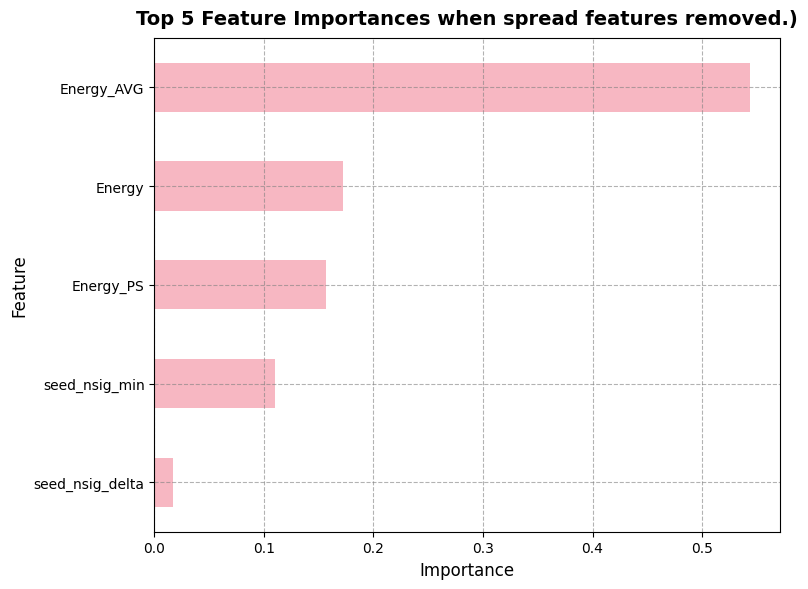

In [ ]:
plt.figure(figsize=(8,6))
importances2.head(5).plot(
    kind="barh",
    color="#f7b7c2",     # soft pastel pink
    edgecolor="none"
)
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.6, color="gray")  # subtle background grid
plt.title("Top 5 Feature Importances when spread features removed.)", fontsize=14, weight="bold", pad=10)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


Still maintained high prediction accuracy despite removing all spread related information. This shows a potential technique for finding features that are correlated with some predictor that may not be immediately obvious.

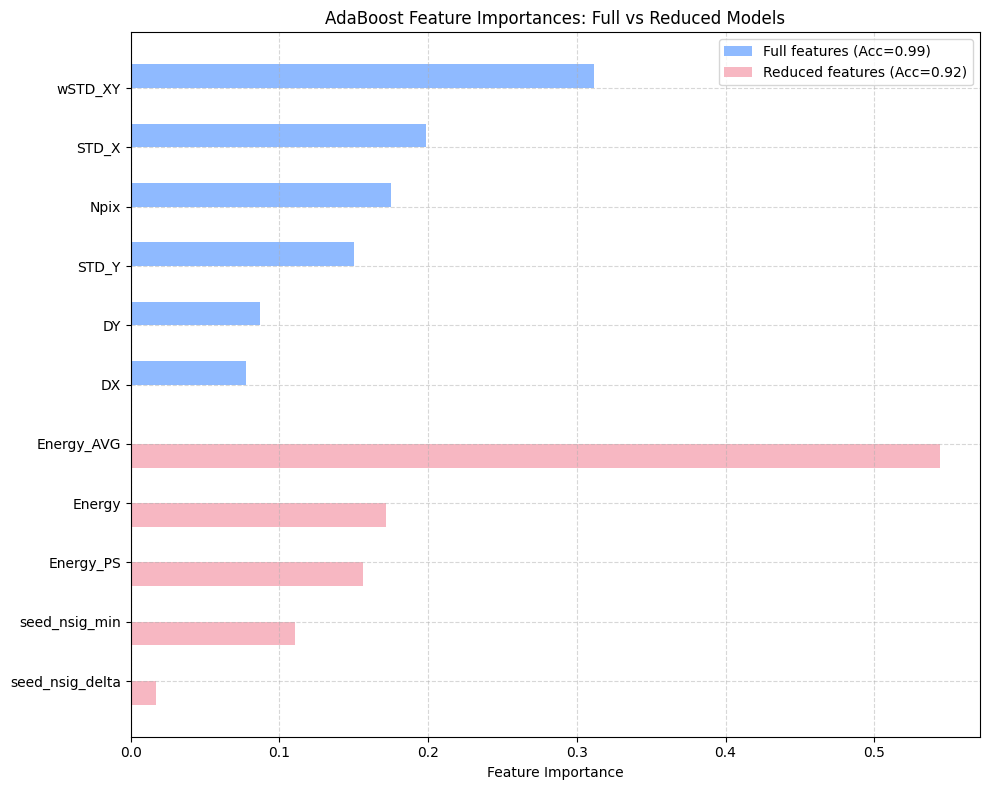

In [ ]:
acc1, acc2 = 0.99, 0.92

# Combine into one DataFrame
imp_df = pd.concat(
    [importances.rename("Model 1"), importances2.rename("Model 2")],
    axis=1
).fillna(0)

# Drop features that are zero for both
imp_df = imp_df[(imp_df["Model 1"] != 0) | (imp_df["Model 2"] != 0)]

# Sort by whichever model has the higher importance
imp_df = imp_df.sort_values(by=["Model 1", "Model 2"], ascending=False)

# --- Plot ---
plt.figure(figsize=(10, 8))
y = np.arange(len(imp_df))

bar_width = 0.4
plt.barh(y - bar_width/2, imp_df["Model 1"], height=bar_width,
         color="#8fbaff", label=f"Full features (Acc={acc1:.2f})")
plt.barh(y + bar_width/2, imp_df["Model 2"], height=bar_width,
         color="#f7b7c2", label=f"Reduced features (Acc={acc2:.2f})")

plt.yticks(y, imp_df.index)
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("AdaBoost Feature Importances: Full vs Reduced Models")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
print("Same y?      ", np.array_equal(y_test, y_test2))
print("Same probs?  ", np.allclose(proba_test, proba_test2))
print("Lens:", len(y_test), len(y_test2), len(proba_test), len(proba_test2))
print("First 5 p1:", proba_test[:5])
print("First 5 p2:", proba_test2[:5])

Same y?       True
Same probs?   False
Lens: 21611 21611 21611 21611
First 5 p1: [0.17438164 0.11920292 0.88079708 0.88079708 0.78745689]
First 5 p2: [0.13321108 0.12353369 0.82607401 0.74030132 0.71499764]


Model 1: AUC=1.000  Acc@0.5=0.990
Model 2: AUC=0.988  Acc@0.5=0.920


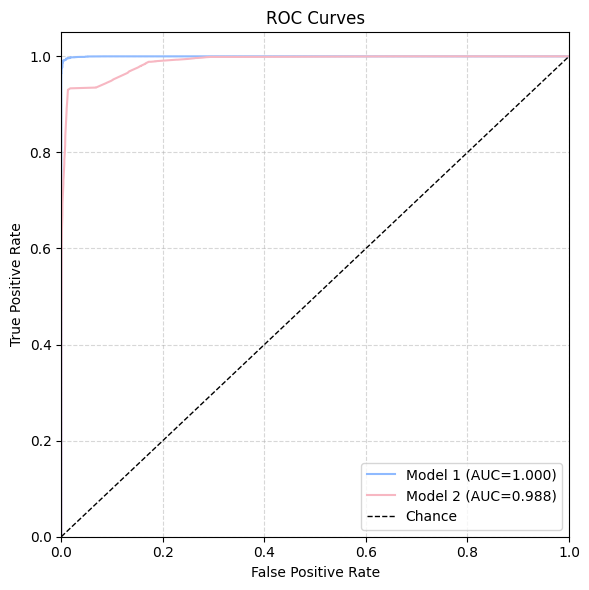

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score

# ROC points
fpr1, tpr1, _ = roc_curve(y_test, proba_test)
fpr2, tpr2, _ = roc_curve(y_test2, proba_test2)

# AUCs
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

# (optional) accuracy at 0.5 threshold
acc1 = accuracy_score(y_test, proba_test  >= 0.5)
acc2 = accuracy_score(y_test2, proba_test2 >= 0.5)

print(f"Model 1: AUC={auc1:.3f}  Acc@0.5={acc1:.3f}")
print(f"Model 2: AUC={auc2:.3f}  Acc@0.5={acc2:.3f}")

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr1, tpr1, label=f"Model 1 (AUC={auc1:.3f})", color="#8fbaff")
plt.plot(fpr2, tpr2, label=f"Model 2 (AUC={auc2:.3f})", color="#f7b7c2")
plt.plot([0,1],[0,1], "k--", linewidth=1, label="Chance")

plt.xlim(0,1); plt.ylim(0,1.05)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### GMM for clustering
I will now train a Gaussian misture model, a model that assumes data is derived from a set of Gaussian distributions, and attmepts to learn the location and parameters of these distributions. I will train the GMM to cluster the raw data and then compare to the our clustering algorithm to see if it reproduces the same/ similar clusters.

In [ ]:
# Start with 1 raw image CCD (just took the first image 5)
path = "/content/drive/My Drive/Clustering project/2025-08-07-DM01_DM02_DM03_Low_Temp/avg_Image_5_Low_Temp_106_20250807_170213_15.fz"

In [ ]:
fits.info(path)

Filename: /content/drive/My Drive/Clustering project/2025-08-07-DM01_DM02_DM03_Low_Temp/avg_Image_5_Low_Temp_106_20250807_170213_15.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   ()      
  1  CCD_A         1 CompImageHDU     11   (640, 320)   float64   
  2  CCD_B         1 CompImageHDU     11   (640, 320)   float64   
  3  CCD_D         1 CompImageHDU     11   (640, 320)   float64   
  4  CCD_C         1 CompImageHDU     11   (640, 320)   float64   


In [ ]:
# peering at data
ext = 1  # CCD_A
with fits.open(path) as hdul:
    data = np.array(hdul[ext].data)
    header = hdul[ext].header

print(f"HDU name: {hdul[ext].name}")
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")

HDU name: CCD_A
Shape: (320, 640)
Data type: float64


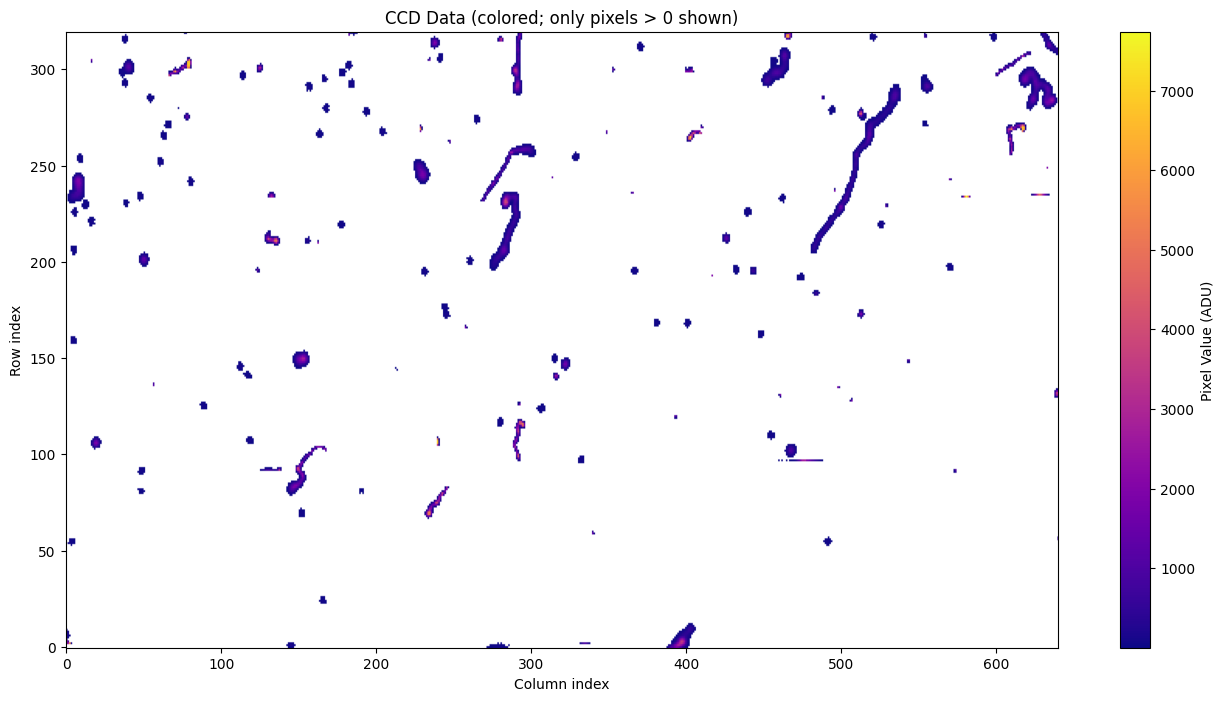

In [ ]:
from matplotlib import colors

# Mask values below 2000
threshold = 0
masked_data = np.ma.masked_less(data, threshold)

# Create a colored colormap (e.g. 'plasma', 'inferno', 'viridis', etc.)
# Set masked (below-threshold) pixels to white
cmap = plt.cm.plasma.copy()
cmap.set_bad(color='white')

plt.figure(figsize=(16, 8))
plt.imshow(masked_data, cmap=cmap, origin='lower', aspect='auto')

# Add color scale and labels
plt.colorbar(label='Pixel Value (ADU)')
plt.title(f"CCD Data (colored; only pixels > {threshold} shown)")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

In [ ]:
# path to clustered version of above image
clustered_data = "/content/drive/My Drive/Clustering project/2025-08-07-DM01_DM02_DM03_Low_Temp/Analysis/Image_5/DM04/panaSKImg_clustersRec_avg_Image_5_Low_Temp_110_20250807_170213_15_ext1.root"

In [4]:
c = uproot.TCanvas

AttributeError: module 'uproot' has no attribute 'TCanvas'